# Importing libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [100]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Reading the CSV data

In [101]:
liver_df = pd.read_csv(r'E:\Downloads\archive (1)\indian_liver_patient.csv')
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Exploratory Data Analysis

In [102]:
liver_df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [103]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [104]:
#details about the dataset
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [105]:
#checking if there is some null values or not
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

# on the Albumin_and_Globulin_Ratio column there are null values

# Data Visualization

Number of patients diagnosed with liver disease 416
Number of patients not diagnosed with liver disease 167


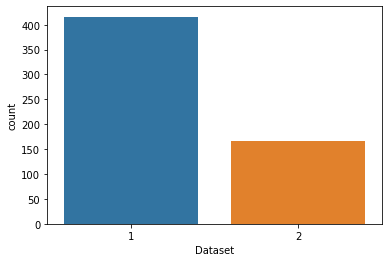

In [106]:

sns.countplot(data=liver_df, x ='Dataset', label = 'Count')

LD,NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease', LD)
print('Number of patients not diagnosed with liver disease', NLD)

Number of patients that are male 441
Number of patients that are female 142


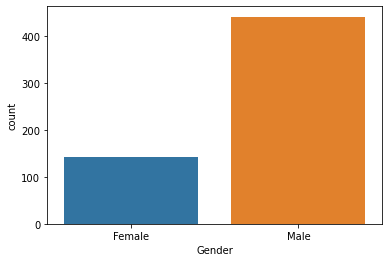

In [107]:
# plotting the number of male and female patient
sns.countplot(data=liver_df, x ='Gender', label = 'Count')

M,F = liver_df['Gender'].value_counts()
print('Number of patients that are male', M)
print('Number of patients that are female', F)

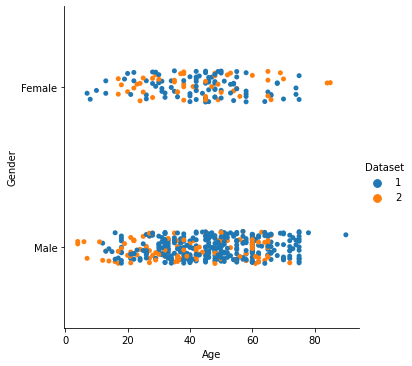

In [108]:
# plotting patient age vs gender
sns.catplot(x="Age", y="Gender", hue="Dataset", data=liver_df)

Text(0.5, 0.98, 'Disease by Gender and Age')

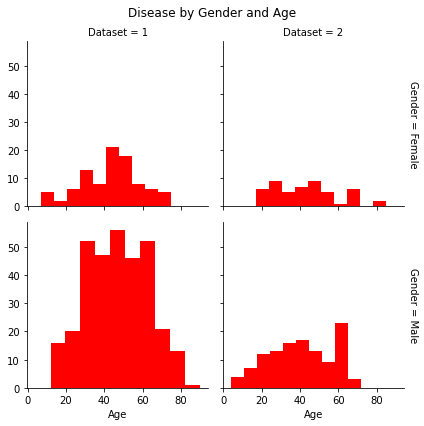

In [109]:
# plotting age vs gender
g = sns.FacetGrid(liver_df, col = "Dataset", row="Gender", margin_titles = True)
g.map(plt.hist, "Age", color = "red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

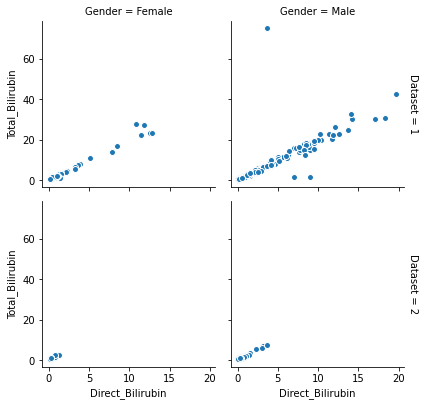

In [110]:
# plotting gender along with Total bilirubin and Direct Bilirubin
g = sns.FacetGrid(liver_df, col = "Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin","Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

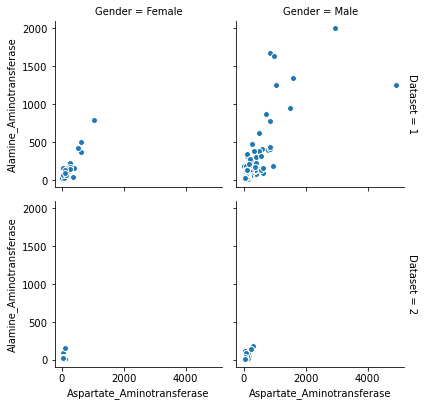

In [111]:
# plotting gender along with Aspartate_Aminotransferase and Alamine_Aminotransferase
g = sns.FacetGrid(liver_df, col = "Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase","Alamine_Aminotransferase", edgecolor="w")
plt.subplots_adjust(top=0.9)

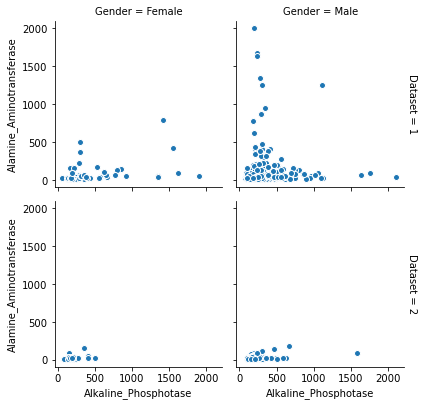

In [112]:
# plotting gender along with Alkaline_Phosphotase and Alamine_Aminotransferase
g = sns.FacetGrid(liver_df, col = "Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase","Alamine_Aminotransferase", edgecolor="w")
plt.subplots_adjust(top=0.9)

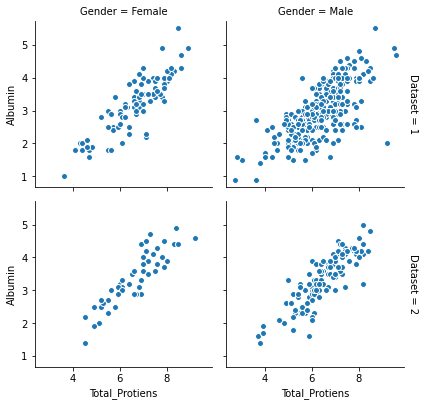

In [113]:
# plotting gender along with Total_Protiens and Albumin
g = sns.FacetGrid(liver_df, col = "Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Total_Protiens","Albumin", edgecolor="w")
plt.subplots_adjust(top=0.9)

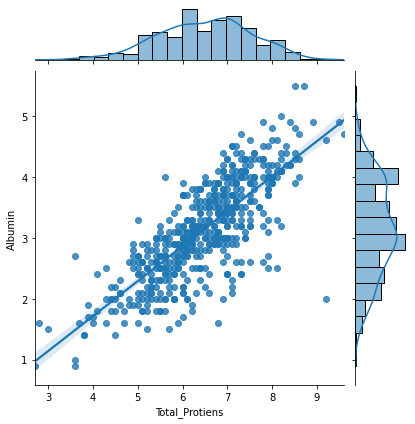

In [114]:
# plotting total protine vs albumin
sns.jointplot("Total_Protiens","Albumin",data=liver_df,kind="reg")

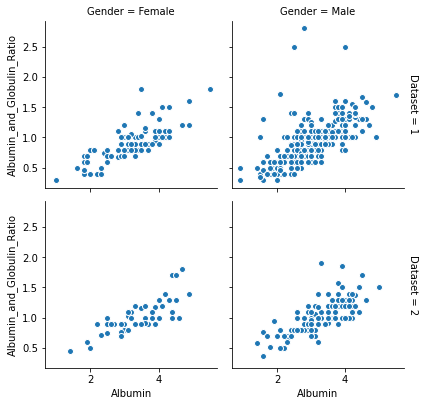

In [115]:
# plotting gender along with Albumin and Albumin_and_Globulin_Ratio
g = sns.FacetGrid(liver_df, col = "Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin","Albumin_and_Globulin_Ratio", edgecolor="w")
plt.subplots_adjust(top=0.9)

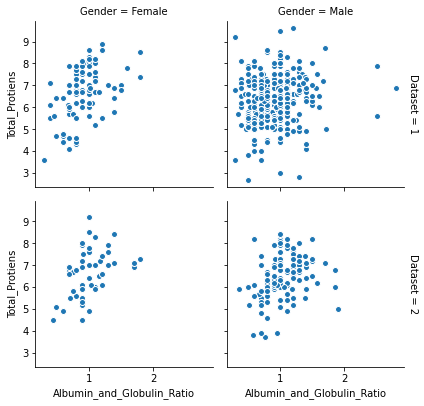

In [116]:
# plotting gender along with Albumin_and_Globulin_Ratio and Total_Protiens
g = sns.FacetGrid(liver_df, col = "Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Albumin_and_Globulin_Ratio","Total_Protiens", edgecolor="w")
plt.subplots_adjust(top=0.9)

# Feature Engineering

In [117]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [118]:
pd.get_dummies(liver_df['Gender'], prefix = 'Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [119]:
# changing the categorical value to numerical value
liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Gender'], prefix = 'Gender')], axis=1)

In [120]:
liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [121]:
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [122]:
# filling the null values with the mean value
liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

In [123]:
X = liver_df.drop(['Gender','Dataset'],axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [124]:
y = liver_df['Dataset']

# Corelation between all features

In [125]:
liver_corr = X.corr()
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


# Splitting the data into Train and Test

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(408, 11)
(408,)
(175, 11)
(175,)


# Model Building

# 1.Logistic Regression

In [127]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)


logreg_pred = logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train)* 100,2)
logreg_score_test = round(logreg.score(X_test, y_test)* 100,2)

# equation coefficient and intercept
print('Logistic Regression Training score: \n',logreg_score)
print('Logistic Regression Test score: \n',logreg_score_test)

print('Accuracy:\n',accuracy_score(y_test,logreg_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,logreg_pred))
print('Classification Report:\n',classification_report(y_test,logreg_pred))


Logistic Regression Training score: 
 71.08
Logistic Regression Test score: 
 72.57
Accuracy:
 0.7257142857142858
Confusion Matrix:
 [[117  11]
 [ 37  10]]
Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.91      0.83       128
           2       0.48      0.21      0.29        47

    accuracy                           0.73       175
   macro avg       0.62      0.56      0.56       175
weighted avg       0.68      0.73      0.69       175



# 2.K-Nearest Neighbours

In [128]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

knn_score = round(knn.score(X_train, y_train)* 100,2)
knn_score_test = round(knn.score(X_test, y_test)* 100,2)

# equation coefficient and intercept
print(' K-Nearest Neighbours Training score: \n',knn_score)
print('K-Nearest Neighbours Test score: \n',knn_score_test)

print('Accuracy:\n',accuracy_score(y_test,knn_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,knn_pred))
print('Classification Report:\n',classification_report(y_test,knn_pred))

 K-Nearest Neighbours Training score: 
 73.53
K-Nearest Neighbours Test score: 
 74.29
Accuracy:
 0.7428571428571429
Confusion Matrix:
 [[117  11]
 [ 34  13]]
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.91      0.84       128
           2       0.54      0.28      0.37        47

    accuracy                           0.74       175
   macro avg       0.66      0.60      0.60       175
weighted avg       0.71      0.74      0.71       175



# 3.Decision Tree

In [129]:
dtree = DecisionTreeClassifier(max_depth = 4 , random_state = 1 , min_samples_leaf =20)
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

dtree_score = round(dtree.score(X_train, y_train)* 100,2)
dtree_score_test = round(knn.score(X_test, y_test)* 100,2)

# equation coefficient and intercept
print(' Decision Tree Training score: \n',dtree_score)
print('Decision Tree Test score: \n',dtree_score_test)

print('Accuracy:\n',accuracy_score(y_test,dtree_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,dtree_pred))
print('Classification Report:\n',classification_report(y_test,dtree_pred))


 Decision Tree Training score: 
 75.98
Decision Tree Test score: 
 74.29
Accuracy:
 0.7371428571428571
Confusion Matrix:
 [[116  12]
 [ 34  13]]
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.91      0.83       128
           2       0.52      0.28      0.36        47

    accuracy                           0.74       175
   macro avg       0.65      0.59      0.60       175
weighted avg       0.71      0.74      0.71       175



# Support Vector Machine

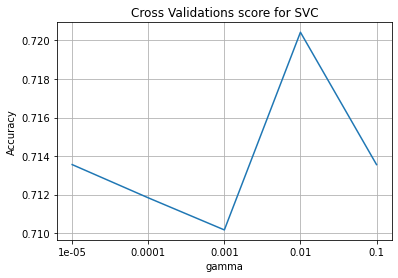

In [130]:
grid = [0.00001, 0.0001, 0.001, 0.01, 0.1]
hist = []
for val in grid:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in grid], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [131]:
svm = SVC(kernel= "linear",C=0.025, gamma=0.01)
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

svm_score = round(svm.score(X_train, y_train)* 100,2)
svm_score_test = round(svm.score(X_test, y_test)* 100,2)

# equation coefficient and intercept
print(' Decision Tree Training score: \n',svm_score)
print('Decision Tree Test score: \n',svm_score_test)

print('Accuracy:\n',accuracy_score(y_test,svm_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,svm_pred))
print('Classification Report:\n',classification_report(y_test,svm_pred))


 Decision Tree Training score: 
 70.59
Decision Tree Test score: 
 73.14
Accuracy:
 0.7314285714285714
Confusion Matrix:
 [[128   0]
 [ 47   0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.73      1.00      0.84       128
           2       0.00      0.00      0.00        47

    accuracy                           0.73       175
   macro avg       0.37      0.50      0.42       175
weighted avg       0.53      0.73      0.62       175



# 5.Gaussian Naive Bayes

In [132]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_pred = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train)* 100,2)
gauss_score_test = round(gaussian.score(X_test, y_test)* 100,2)

# equation coefficient and intercept
print(' Decision Tree Training score: \n',gauss_score)
print('Decision Tree Test score: \n',gauss_score_test)

print('Accuracy:\n',accuracy_score(y_test,gaussian_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,gaussian_pred))
print('Classification Report:\n',classification_report(y_test,gaussian_pred))


 Decision Tree Training score: 
 54.17
Decision Tree Test score: 
 57.14
Accuracy:
 0.5714285714285714
Confusion Matrix:
 [[54 74]
 [ 1 46]]
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.42      0.59       128
           2       0.38      0.98      0.55        47

    accuracy                           0.57       175
   macro avg       0.68      0.70      0.57       175
weighted avg       0.82      0.57      0.58       175



# 6.Random Forest

In [133]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train)* 100,2)
random_forest_score_test = round(random_forest.score(X_test, y_test)* 100,2)

# equation coefficient and intercept
print(' Decision Tree Training score: \n',random_forest_score)
print('Decision Tree Test score: \n',random_forest_score_test)

print('Accuracy:\n',accuracy_score(y_test,rf_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,rf_pred))
print('Classification Report:\n',classification_report(y_test,rf_pred))


 Decision Tree Training score: 
 100.0
Decision Tree Test score: 
 74.29
Accuracy:
 0.7428571428571429
Confusion Matrix:
 [[113  15]
 [ 30  17]]
Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.88      0.83       128
           2       0.53      0.36      0.43        47

    accuracy                           0.74       175
   macro avg       0.66      0.62      0.63       175
weighted avg       0.72      0.74      0.73       175



# Conclusion


# From the models K-Nearest Neighbours perform the best on this dataset